In [2]:
# 4. F1 Score

from sklearn.metrics import f1_score
import pandas as pd
from chapter2.transform_titanic_df import transform_features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('C:/Users/minjo/MLdata/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(max_iter=120)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print('F1 Score = {0:.4f}'.format(f1_score(y_test, pred)))

F1 Score = 0.7805


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 5. ROC curve & ROC-AUC score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# just added F1 score & ROC-AUC score to previous section's contents
def get_clf_eval(y_test, pred, pred_proba_c1):
    matrix = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)  # F1 score
    roc_auc = roc_auc_score(y_test, pred_proba_c1)
    print('Confusion Matrix: ')
    print(matrix)
    print('Accuracy = {0:.4f}, Precision = {1:.4f}, Recall = {2:.4f}, F1 Score = {3:.4f}, '
          'AUC score = {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# same as previous section's contents -----------
pred_proba = lr_clf.predict_proba(X_test)
from sklearn.preprocessing import Binarizer  # makes a binary prediction based on the threshold

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    # pred_proba_c1: probabilities of each row being 1
    for my_threshold in thresholds:
        binarizer = Binarizer(threshold=my_threshold).fit(pred_proba_1)
        pred = binarizer.transform(pred_proba_1)
        print('Threshold = ', my_threshold)
        get_clf_eval(y_test, pred, pred_proba_1)
        print()

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)
# -----------------------------------------------

Threshold =  0.4
Confusion Matrix: 
[[98 20]
 [10 51]]
Accuracy = 0.8324, Precision = 0.7183, Recall = 0.8361, F1 Score = 0.7727, AUC score = 0.9024

Threshold =  0.45
Confusion Matrix: 
[[103  15]
 [ 12  49]]
Accuracy = 0.8492, Precision = 0.7656, Recall = 0.8033, F1 Score = 0.7840, AUC score = 0.9024

Threshold =  0.5
Confusion Matrix: 
[[104  14]
 [ 13  48]]
Accuracy = 0.8492, Precision = 0.7742, Recall = 0.7869, F1 Score = 0.7805, AUC score = 0.9024

Threshold =  0.55
Confusion Matrix: 
[[109   9]
 [ 15  46]]
Accuracy = 0.8659, Precision = 0.8364, Recall = 0.7541, F1 Score = 0.7931, AUC score = 0.9024

Threshold =  0.6
Confusion Matrix: 
[[112   6]
 [ 16  45]]
Accuracy = 0.8771, Precision = 0.8824, Recall = 0.7377, F1 Score = 0.8036, AUC score = 0.9024



In [8]:
import numpy as np

pred_proba_positive = pred_proba[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_positive)
th_idxs = np.arange(1, thresholds.shape[0], 6)
print('Indexes selected: ', th_idxs)
print('Thresholds selected: ', np.round(thresholds[th_idxs], 4))
print('FPR for each case:   ', np.round(fprs[th_idxs], 4))
print('TPR for each case:   ', np.round(tprs[th_idxs], 4))

Indexes selected:  [ 1  7 13 19 25 31 37 43 49]
Thresholds selected:  [0.9651 0.6512 0.6266 0.5377 0.4034 0.3479 0.1481 0.1228 0.1115]
FPR for each case:    [0.     0.0254 0.0424 0.0847 0.161  0.2034 0.4831 0.6186 0.7881]
TPR for each case:    [0.0328 0.6393 0.7377 0.7869 0.8361 0.8852 0.9016 0.9508 0.9672]


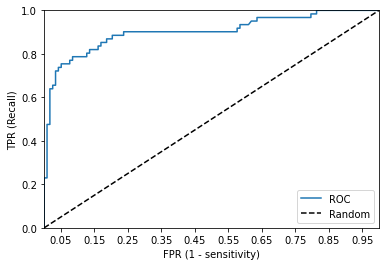

In [9]:
# Draw the ROC curve
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_positive):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_positive)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR (1 - sensitivity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba_positive)

In [10]:
print('ROC-AUC score = {0:.4f}'.format(roc_auc_score(y_test, pred_proba_positive)))

ROC-AUC score = 0.9024
